# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Data From Dataset

In [2]:
dataframe = pd.read_csv("/kaggle/input/zomato-dataset/Zomato data  - Zomato data  (1).csv")

# Displaying Number Of Rows And Columns

In [3]:
dataframe.shape

(148, 7)

# Displaying The Data Of Top 10 Rows

In [4]:
dataframe.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


# Cleaning The Dataset By Removing The Denominator From The 'Rate' Column

In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Scanning The Dataset

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Checking For Null Values In The Dataset

In [7]:
pd.isnull(dataframe).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Displaying The Top 10 Restaurants Which Have Highest Rating

In [8]:

top_10_restaurants = dataframe.sort_values(by ='rate', ascending=False).head(10)

print("Top 10 Restaurants by Rating: ")
print(top_10_restaurants)

Top 10 Restaurants by Rating: 
                      name online_order book_table  rate  votes  \
44                  Onesta          Yes        Yes   4.6   2556   
7                   Onesta          Yes        Yes   4.6   2556   
38       Empire Restaurant          Yes         No   4.4   4884   
86           Meghana Foods          Yes         No   4.4   4401   
52  Corner House Ice Cream           No         No   4.3    345   
37         Szechuan Dragon          Yes         No   4.2   1647   
60           Peppy Peppers           No         No   4.2    244   
81           Frozen Bottle          Yes         No   4.2    146   
12        The Coffee Shack          Yes        Yes   4.2    164   
11            Cafe Shuffle          Yes        Yes   4.2    150   

    approx_cost(for two people) listed_in(type)  
44                          600           other  
7                           600           Cafes  
38                          750           other  
86                          600

# EXPLORATORY DATA ANALYSIS

# Countgraph For 'Types Of Restaurants'

Text(0.5, 0, 'Type of restaurant')

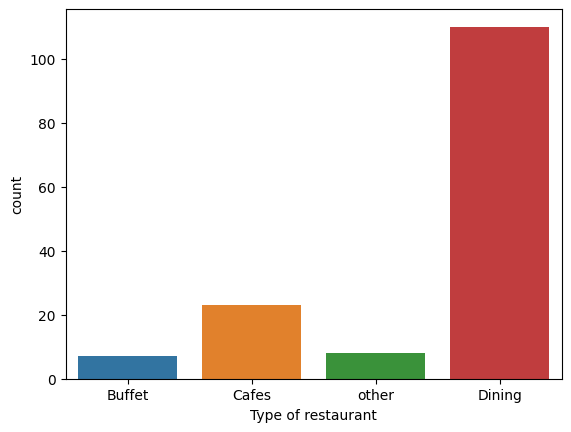

In [9]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

# CONCLUSION:
1. Majority of restaurants fall in the category of 'dinning'.
2. Minority of restaurants fall in the category of 'buffet'.

# Graph For 'Types Of Restaurants' V/S 'Votes'

Text(0, 0.5, 'Votes')

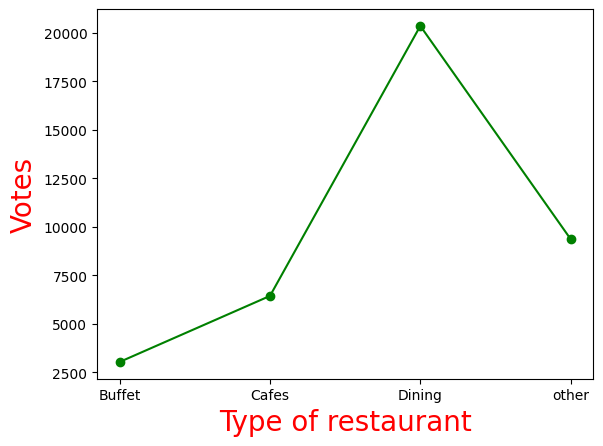

In [10]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

# CONCLUSION:
1. Dining restaurants are preferred by more number of people.
2. Buffet restaurants are preferred by a less number of people.

# Name Of Restaurant With Maximum Number Of Votes

In [11]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


# Countgraph To Observe How Many Restaurants Accepts 'Online Orders'

<Axes: xlabel='online_order', ylabel='count'>

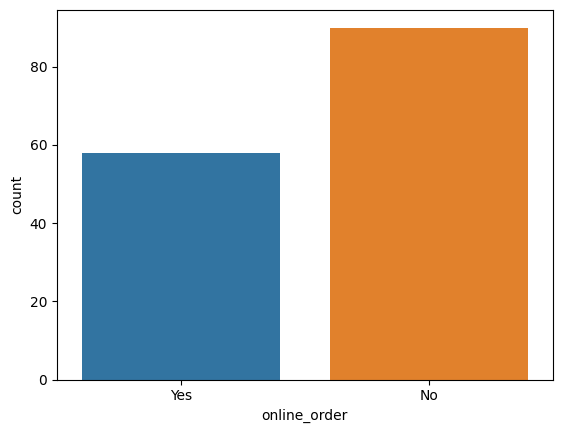

In [12]:
sns.countplot(x=dataframe['online_order'])


# CONCLUSION:
 
 Majority of the restaurants do not accept online orders as per the dataset.

# Countgraph To Observe How Many People Book Table IN Advance

Text(0.5, 0, 'Book Table In Advance')

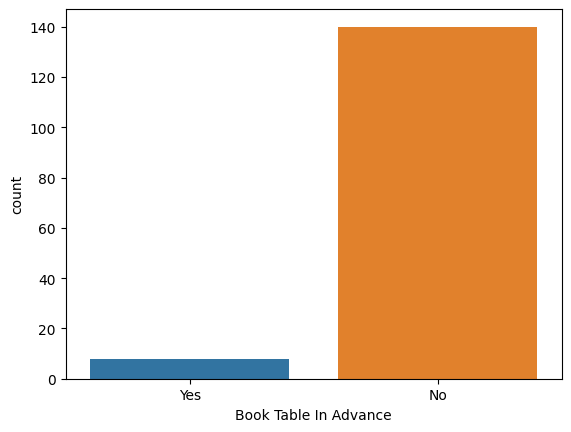

In [13]:
sns.countplot(x=dataframe['book_table'])
plt.xlabel("Book Table In Advance")

# CONCLUSION:

Majority of people do not prefer to book table in advance as per the data.

# Graph For 'Rating' V/S 'Number Of Restaurants'

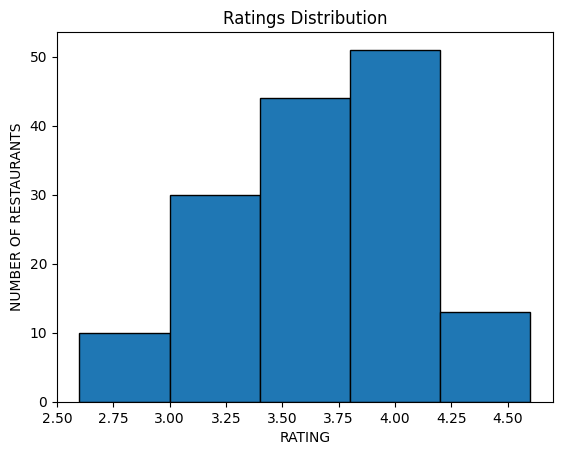

In [14]:
plt.hist(dataframe['rate'],bins=5,edgecolor='black')
plt.title("Ratings Distribution")
plt.xlabel('RATING')
plt.ylabel('NUMBER OF RESTAURANTS')
plt.show()


# CONCLUSION:

Majority of restaurants have 4 rating as per the dataset. 

# Graph For 'Cost Of Two People' V/S 'Number Of Couple'

<Axes: xlabel='online_order', ylabel='rate'>

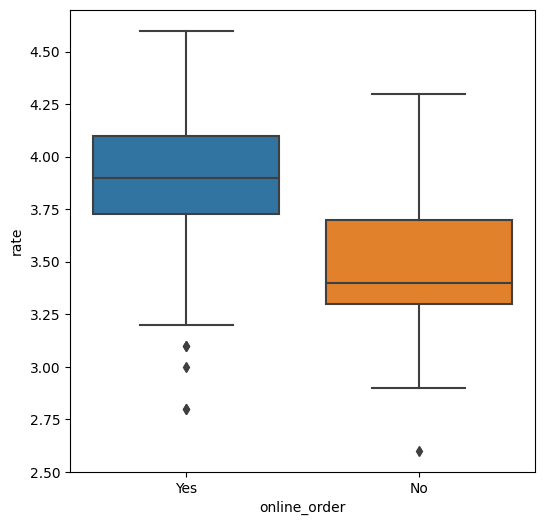

In [15]:

plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

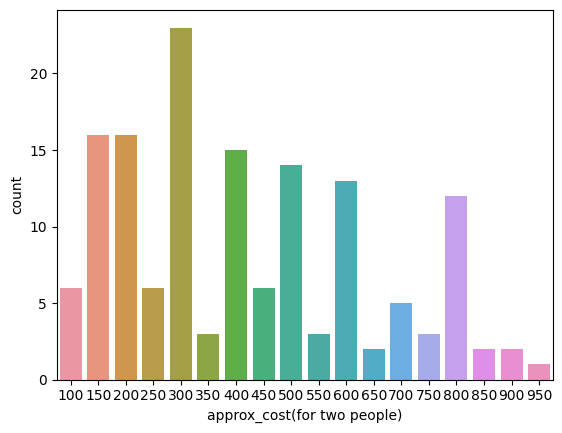

In [16]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
sns.set(rc={'figure.figsize':(15,5)})


# CONCLUSION:

 Majority of couples prefer restaurants which provide the approximate cost for two people = 300 rupees.

# Graph For 'Online Order' V/S 'Rate'

<Axes: xlabel='online_order', ylabel='rate'>

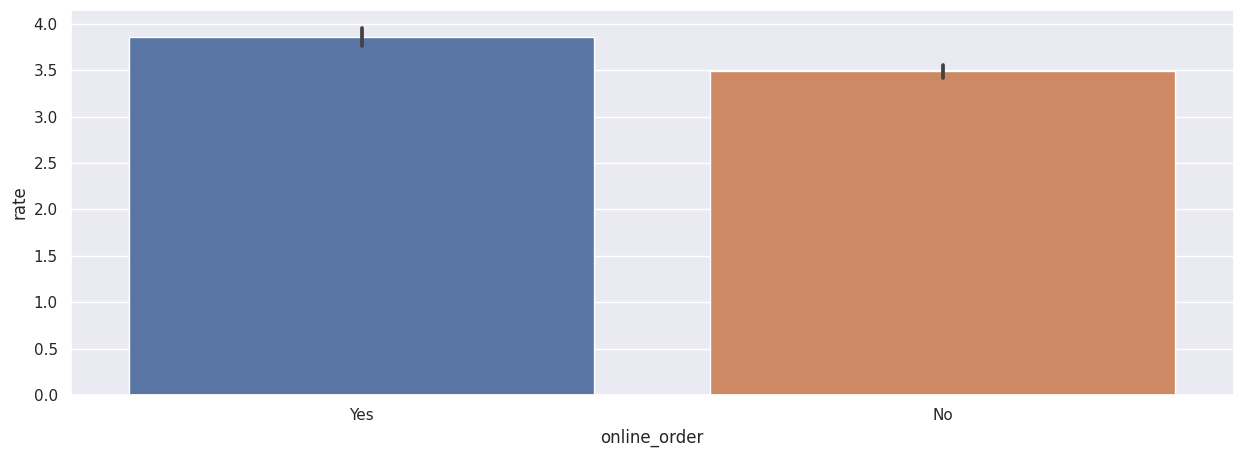

In [17]:
sns.barplot(x="online_order", y="rate", data=dataframe)

# CONCLUSION :
Majority of restaurants recieve higher ratings for online orders.

# Graph For 'Online Order' V/S 'Types Of Restaurants'

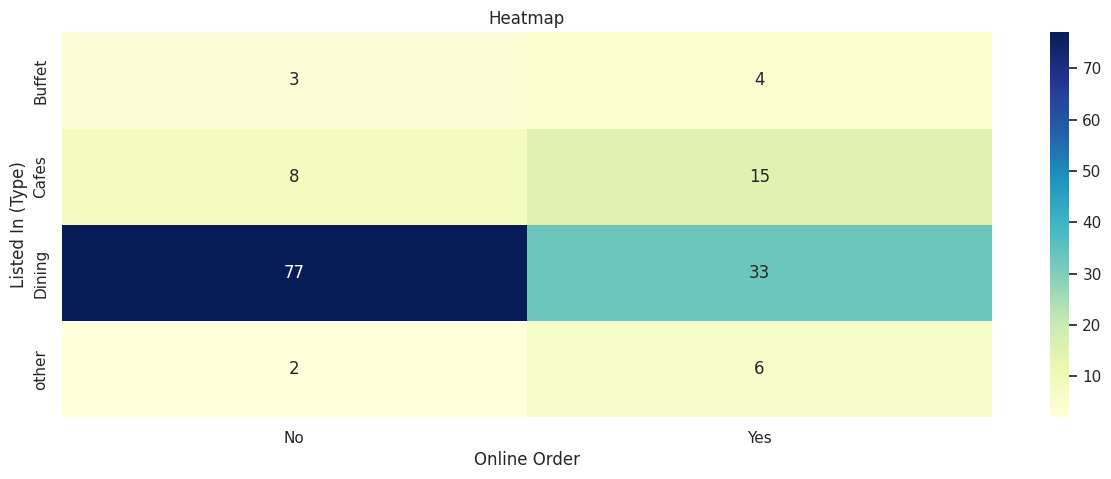

In [18]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


# CONCLUSION:

1. Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. 

2. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.